In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import beta
import pickle
from scipy.stats import pearsonr
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
from itertools import combinations
from tabulate import tabulate

In [35]:
similar_sets={
    'EI':[[2,4],[0,10],[6,15]],
    'WI':[[30,33,38,44,47,50]],
    'EC':[[29,46],[32,49,53],[35,52]],
    'WC':[[1,17],[5,21,25],[9,23]],
    'EA':[[3,7,20,26],[11,22],[18,24]],
    'WA':[[34,39,45,51],[31,42,28]],
    'E':[[79,99]],
    'A':[[80,105]],
    'N':[[92,122]],
    'O':[[88,103],[98,123]]
}
traits=['EI','WI','EC','WC','EA','WA','E','A','N','O']
df=pd.read_csv('CSV/Labelled_data.csv')
questions={
    'EI':[0,2,4,6,8,10,12,14,16],
    'WI':[27,30,33,36,38,41,44,47,50],
    'EC':[39,32,35,40,43,46,49,52,53],
    'WC':[1,5,9,13,17,19,21,23,25],
    'EA':[3,7,11,16,18,20,22,24,26],
    'WA':[28,31,34,37,39,42,45,48,51],
    'AM':[56,60,72],
    'LC':[54,59,64,67],
    'MC':[55,62,65,69],
    'ND':[63,66],
    'PfW':[58,68,71],
    'SE':[57,61,70,73],
    'E':[74,79,84,89,94,99,104,109,114,119],
    'A':[75,80,85,90,95,100,105,110,115,120],
    'C':[76,81,86,91,96,101,106,111,116,121],
    'N':[77,82,87,92,97,102,107,112,117,122],
    'O':[78,83,88,93,98,103,108,113,118,123]
}
def I_label(score):
    if(score==6 or score==7):
        return 0
    if(score>=2 and score <=5):
        return 1
    else:
        return 2
def C_label(score):
    if(score>=4 and score<=7):
        return 0
    elif(score==2 or score==3):
        return 1
    else:
        return 2
def A_label(score):
    if(score>=4 and score<=6):
        return 0
    if(score>=7 and score <=9):
        return 1
    else:
        return 2
def AM_LC_label(score):
    if(score>=4 and score<=5):
        return 0
    elif(score>=2.6 and score<=3.9):
        return 1
    else:
        return 2
def rest_label(score):
    if(score>=4 and score<=6):
        return 0
    elif(score>=2.6 and score<=3.9):
        return 1
    else:
        return 2
def EN_label(score):
    if(score>=0 and score<=25):
        return 0
    elif(score>=26 and score<=40):
        return 1
    else:
        return 2
def AO_label(score):
    if(score>=0 and score<=30):
        return 0
    elif(score>=31 and score<=40):
        return 1
    else:
        return 2
def C3_label(score):
    if(score>=36 and score<=50):
        return 0
    elif(score>=26 and score<=35):
        return 1
    else:
        return 2
def I_smoothing(x):
    return(((8-x)*math.exp(0.6*x)+221.406)/29.591)
def C_smoothing(x):
    return(((12-x)*math.exp(0.15*x)-11.572)/0.327)
def A_smoothing(x):
    return((2+((x-2)*math.exp(-0.32*x)))/0.261)
def identity(x):
    return x
functions={
    'EI':I_label,
    'WI':I_label,
    'EC':C_label,
    'WC':C_label,
    'EA':A_label,
    'WA':A_label,
    'AM':AM_LC_label,
    'LC':AM_LC_label,
    'MC':rest_label,
    'ND':rest_label,
    'PfW':rest_label,
    'SE':rest_label,
    'E':EN_label,
    'A':AO_label,
    'C':C3_label,
    'N':EN_label,
    'O':AO_label
}
smoothing={
    'EI':I_smoothing,
    'WI':I_smoothing,
    'EC':C_smoothing,
    'WC':C_smoothing,
    'EA':A_smoothing,
    'WA':A_smoothing,
    'AM':identity,
    'LC':identity,
    'MC':identity,
    'ND':identity,
    'PfW':identity,
    'SE':identity,
    'E':identity,
    'A':identity,
    'C':identity,
    'N':identity,
    'O':identity
}

In [36]:
def ml(X,labels):
    split_index = int(0.6 * df.shape[0])
    labels=np.array(labels)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = labels[:split_index], labels[split_index:]
    logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
    logistic_regression_classifier.fit(X_train, y_train)
    y_pred = logistic_regression_classifier.predict(X_test)
    acc_logistic=accuracy_score(y_test, y_pred)
    svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    acc_svm=accuracy_score(y_test, y_pred)
    h1=len(X_train[0])
    mlp = MLPClassifier(hidden_layer_sizes=(2*h1,6), max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    acc_mlp=accuracy_score(y_test, y_pred)
    random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_classifier.fit(X_train, y_train)
    y_pred = random_forest_classifier.predict(X_test)
    acc_rf=accuracy_score(y_test, y_pred)
    data=[acc_logistic,acc_svm,acc_mlp,acc_rf]
    return data

In [37]:
def reliability1():
    l=df.shape[0]
    rel=np.zeros(1)
    for trait in traits:
        subsets=similar_sets[trait]
        scores=[]
        dissimilar=[(80,105),(92,122),(88,103),(105,80),(122,92),(103,88)]
        for ques in subsets:
            n=len(ques)
            r=np.zeros(1)
            s=np.zeros(l)
            cnt=0
            for i in range(n):
                for j in range(i+1,n):
                    cnt+=1
                    x1=np.array(list(df[f'feature{ques[i]}']))
                    x2=np.array(list(df[f'feature{ques[j]}']))
                    if((ques[i],ques[j]) in dissimilar):
                        r=np.abs(x1+x2)
                    else:
                        r=np.abs(x1-x2)
                    for k in range(l):
                        s[k]+=1-r[k]/np.max(r)
            for k in range(l):
                s[k]=s[k]/cnt
            scores.append(s)
        scores=np.array(scores)
        scores=np.transpose(scores)
        if(trait=='EI'):
            rel=scores
        else:
            rel=np.concatenate((rel,scores),axis=1)
    sns.heatmap(rel,cmap='viridis')
    plt.xlabel('Subsets')
    plt.ylabel('Individuals')
    plt.title('Reliability')
    plt.show()
    return rel

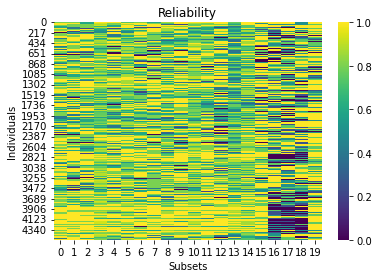

array([[1.  , 0.4 , 0.8 , ..., 1.  , 1.  , 1.  ],
       [0.6 , 1.  , 0.2 , ..., 0.5 , 0.75, 0.5 ],
       [0.8 , 0.8 , 0.6 , ..., 1.  , 0.5 , 1.  ],
       ...,
       [1.  , 1.  , 0.4 , ..., 1.  , 1.  , 1.  ],
       [0.8 , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 0.8 , ..., 0.  , 0.  , 0.75]])

In [38]:
reliability1()

In [39]:
def reliability2():
    l=df.shape[0]
    rel=np.zeros(1)
    for trait in traits:
        subsets=similar_sets[trait]
        scores=[]
        dissimilar=[(80,105),(92,122),(88,103),(105,80),(122,92),(103,88)]
        for ques in subsets:
            n=len(ques)
            r=np.zeros(1)
            cnt=0
            s=[]
            for k in range(l):
                s.append([])
            scr=np.zeros(l)
            for i in range(n):
                for j in range(i+1,n):
                    cnt+=1
                    x1=np.array(list(df[f'feature{ques[i]}']))
                    x2=np.array(list(df[f'feature{ques[j]}']))
                    if((ques[i],ques[j]) in dissimilar):
                        r=np.abs(x1+x2)
                    else:
                        r=np.abs(x1-x2)
                    for k in range(l):
                        s[k].append(1-r[k]/np.max(r))
            for k in range(l):
                s[k]=np.array(s[k])
                scr[k]=np.min(s[k])
            scores.append(scr)
        scores=np.transpose(np.array(scores))
        if(trait=='EI'):
            rel=scores
        else:
            rel=np.concatenate((rel,scores),axis=1)
    sns.heatmap(rel,cmap='viridis')
    plt.xlabel('Subsets')
    plt.ylabel('Individuals')
    plt.title('Reliability')
    plt.show()
    return rel

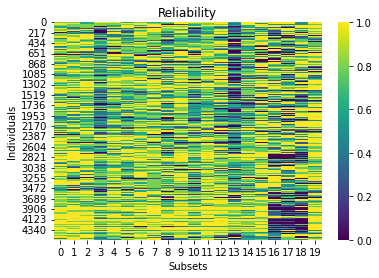

array([[1.  , 0.4 , 0.8 , ..., 1.  , 1.  , 1.  ],
       [0.6 , 1.  , 0.2 , ..., 0.5 , 0.75, 0.5 ],
       [0.8 , 0.8 , 0.6 , ..., 1.  , 0.5 , 1.  ],
       ...,
       [1.  , 1.  , 0.4 , ..., 1.  , 1.  , 1.  ],
       [0.8 , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 0.8 , ..., 0.  , 0.  , 0.75]])

In [40]:
reliability2()

In [41]:
def reliability3():
    similar_sets={
    'WI':[[30,33,38,44,47,50]],
    'EC':[[32,49,53]],
    'WC':[[5,21,25]],
    'EA':[[3,7,20,26]],
    'WA':[[34,39,45,51],[31,42,28]]
    }
    l=df.shape[0]
    rel=np.zeros(1)
    dissimilar=[(80,105),(92,122),(88,103),(105,80),(122,92),(103,88)]
    new_traits=['WI','EC','WC','EA','WA']
    for trait in new_traits:
        subsets=similar_sets[trait]
        scores=[]
        for ques in subsets:
            s=np.zeros(l)
            n=len(ques)
            for k in range(l):
                values=[]
                for q in ques:
                    values.append(df[f'feature{q}'][k])
                if(ques in dissimilar):
                    s[k],_=pearsonr(values,range(len(values)))
                    s[k]=-s[k]
                else:
                    s[k],_=pearsonr(values,range(len(values)))
            scores.append(s)
        scores=np.array(scores)
        scores=np.transpose(scores)
        if(trait=='WI'):
            rel=scores
        else:
            rel=np.concatenate((rel,scores),axis=1)
    sns.heatmap(rel,cmap='viridis')
    plt.xlabel('Subsets')
    plt.ylabel('Individuals')
    plt.title('Reliability')
    plt.show()
    return rel

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


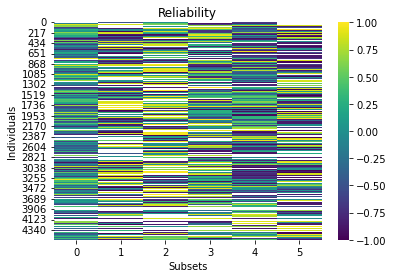

array([[-5.07092553e-01,  3.27326835e-01,             nan,
         2.58198890e-01,  7.74596669e-01,  8.66025404e-01],
       [ 6.54653671e-01,             nan, -8.66025404e-01,
        -7.74596669e-01, -6.26224291e-02,             nan],
       [            nan, -5.00000000e-01,  8.00341168e-18,
                    nan, -6.74199862e-01,             nan],
       ...,
       [ 1.91662969e-01, -8.66025404e-01,  7.66409951e-01,
         1.34839972e-01, -2.58198890e-01,  2.42622514e-17],
       [            nan,             nan,             nan,
        -7.91135681e-02, -4.38357004e-01,             nan],
       [ 6.54653671e-01,             nan,  2.42622514e-17,
        -7.74596669e-01,  7.74596669e-01,             nan]])

In [42]:
reliability3()

In [43]:
# def correlation_algo(trait,scr):
#     truncate_index = int(len(df) * 0.6)
#     truncated_df = df.iloc[truncate_index:]
#     indices=questions[trait]
#     f=len(indices)
#     y=[functions[trait](i) for i in list(truncated_df[trait])]
#     values=[smoothing[trait](i) for i in list(truncated_df[trait])]
#     X=[]
#     for i in indices:
#         X.append(list(truncated_df[f'feature{i}']))
#     l=len(X[0])
#     corr_matrix=np.zeros((f,3))
#     weight_matrix=np.zeros((f,3))
#     for i in range(3):
#         c=[values[j] for j in range(l) if y[j]==i]
#         if(len(c)>0):
#             for j in range(f):
#                 x_temp=[X[j][k] for k in range(l) if y[k]==i]
#                 corr, _ = pearsonr(x_temp, c)
#                 corr_matrix[j][i]=abs(corr)
#             x=list(corr_matrix[:,i])
#             rank_indices=np.argsort(x)
#             rank=1
#             for idx in rank_indices:
#                 weight_matrix[idx][i]=rank
#                 rank=rank+1
#     correlation=np.zeros((f,f))
#     for i in range(f):
#         for j in range(f):
#             x1=X[i][:]
#             x2=X[j][:]
#             corr, _ = pearsonr(x1,x2)
#             correlation[i][j]=corr
#     scores=[]
#     for i in range(f):
#         weight_sum=0
#         corr_sum=0
#         for j in range(3):
#             corr_sum=corr_sum+(corr_matrix[i][j]*weight_matrix[i][j])
#             weight_sum=weight_sum+weight_matrix[i][j]
#         scores.append((corr_sum*f)/(weight_sum*np.sum(correlation[i])))
#     rank_features=np.argsort(scores)
#     data=[]
#     labels=[functions[trait](i) for i in list(df[trait])]
#     l=len(scores)-1
#     correct_order=[]
#     for i in range(f):
#         correct_order.append(indices[rank_features[l]])
#         l=l-1
#     for i in range(1,f):
#         refined_set=correct_order[:i]
#         discarded_set=correct_order[i:]
#         print(f'Refined set :{refined_set}, Discarded set:{discarded_set}')
#         X1=[]
#         for j in range(df.shape[0]):
#             x=[]
#             for k in refined_set:
#                 x.append(list(df[f'feature{k}'])[j])
#             X1.append(x)
#         X1=np.array(X1)
#         X1=np.concatenate((X1,scr),axis=1)
#         info=ml(X1,labels)
#         print(max(info))
#         data.append(info)
#     return data
# def call_reductions(trait,reliability):
#     headers=['Logistic','SVM','MLP','Random Forest']
#     scores=reliability()
#     indices=questions[trait]
#     f=len(indices)
#     labels=[functions[trait](i) for i in list(df[trait])]
#     l=len(labels)
#     data=correlation_algo(trait,scores)
#     X=[]
#     for i in range(l):
#         x=[]
#         for j in indices:
#             x.append(list(df[f'feature{j}'])[i])
#         X.append(x)
#     info=ml(X,labels)
#     data.append(info)
#     print(f'Before reduction Accuracy={max(info)}')
#     print(tabulate(data, headers=headers, tablefmt="grid"))

In [44]:
# call_reductions('EI',reliability1)